<a href="https://colab.research.google.com/github/JSK-Sowmith/DataScienceProjects/blob/main/Yulu_Bikes_Hypothesis_Testing_Business_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Business Case: Yulu - Hypothesis Testing
About Yulu:
Yulu is India's leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.
Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc.) to make those first and last miles smooth, affordable, and convenient!

Problem Statement:
Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

#Solution code starts:
Importing the required libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Loading the Dataset:

In [ ]:
csv_path = "yulu dataset.txt"
df = pd.read_csv(csv_path, delimiter=",")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Shape of the dataset:

In [ ]:
print(f"no.of rows: {df.shape[0]}\nno.of columns: {df.shape[1]}")

no.of rows: 10886
no.of columns: 12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Checking for null values  or missing values:

In [ ]:
df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


There are no null values.

Checking for duplicate rows:

In [ ]:
dup_rows = df[df.duplicated()]
print("No.of duplicate rows: ",dup_rows.shape[0])

No.of duplicate rows:  0


Datatype of following attributes needs to change to proper data type

datetime - to datetime

season - to categorical

holiday - to categorical

working day - to categorical

weather - to categorical

In [ ]:
#changing the below categories to proper data type
df['datetime'] = pd.to_datetime(df['datetime'])
cat_cols = ['season','holiday','workingday','weather']
for col in cat_cols:
  df[col] = df[col].astype('object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


Checking the unique values for every category:

In [ ]:
# number of unique values in each categorical columns
df[cat_cols].melt().groupby(['variable', 'value'])[('value')].count()

variable    value
holiday     0        10575
            1          311
season      1         2686
            2         2733
            3         2733
            4         2734
weather     1         7192
            2         2834
            3          859
            4            1
workingday  0         3474
            1         7412
Name: value, dtype: int64

Let's try to find the correlation between the categories using a heatmap:

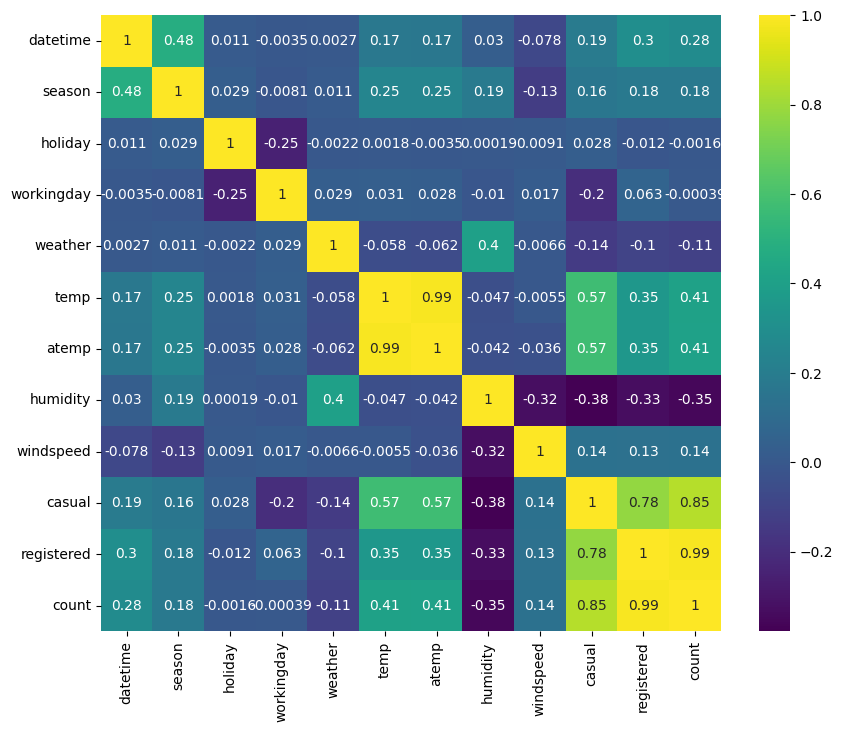

In [ ]:
#correaltion heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(method='spearman'),annot=True,cmap='viridis')
plt.show()

From the correlation we can understand that:

1. Feeling temperature or apparent temperature and temp are highly correlated, because they are most of the times approximately the same have a very small difference.

2. Count, causal, registered are all highly correlated to each other.

We shall remove or drop highly correlated columns to eliminate multicollinearity:

In [ ]:
#Dropping highly corelated columns
dfn = df.drop(columns=['casual','registered','atemp'])

Detecting the outliers present in our dataset:

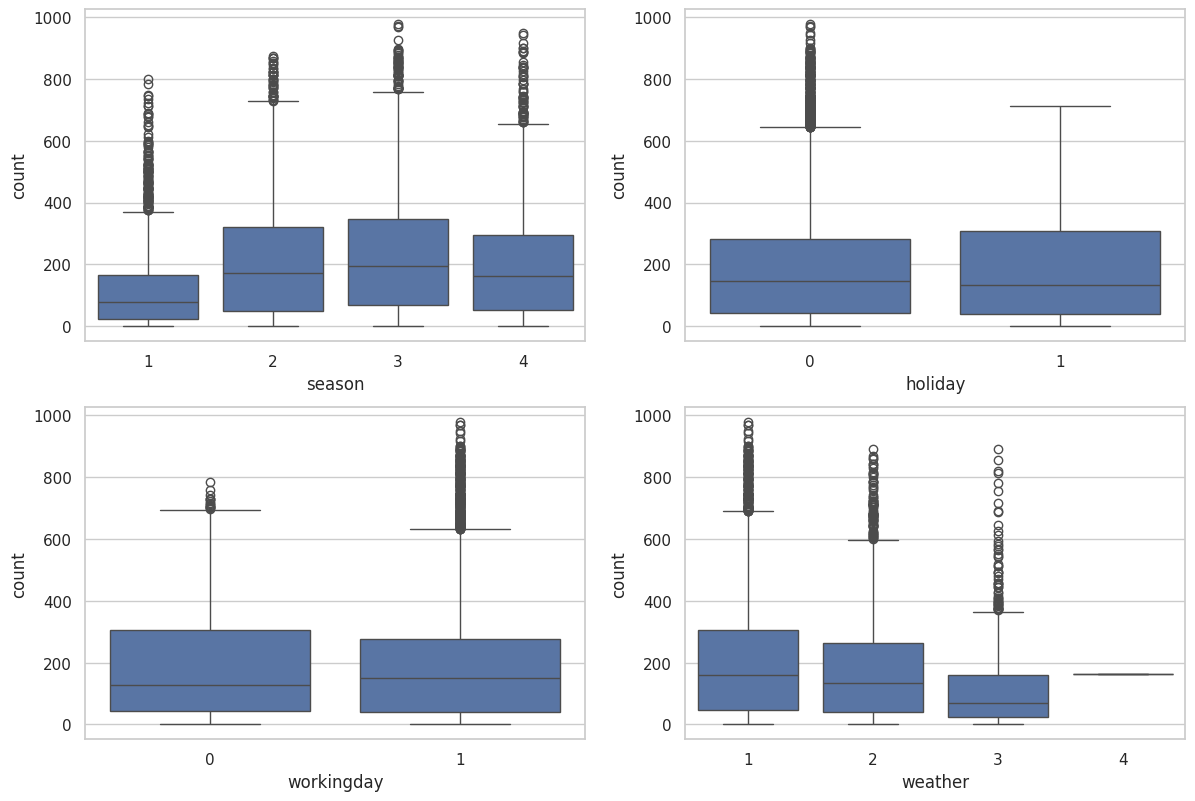

In [ ]:
# Outlier Detection using Boxplots -
sns.set(style="whitegrid")
fig = plt.figure(figsize=(8,25))
fig.subplots_adjust(right=1.5)
for plot in range (1, len(cat_cols)+1):
  plt.subplot(5,2, plot)
  sns.boxplot(x=dfn[cat_cols[plot-1]], y=dfn['count'])
plt.show()

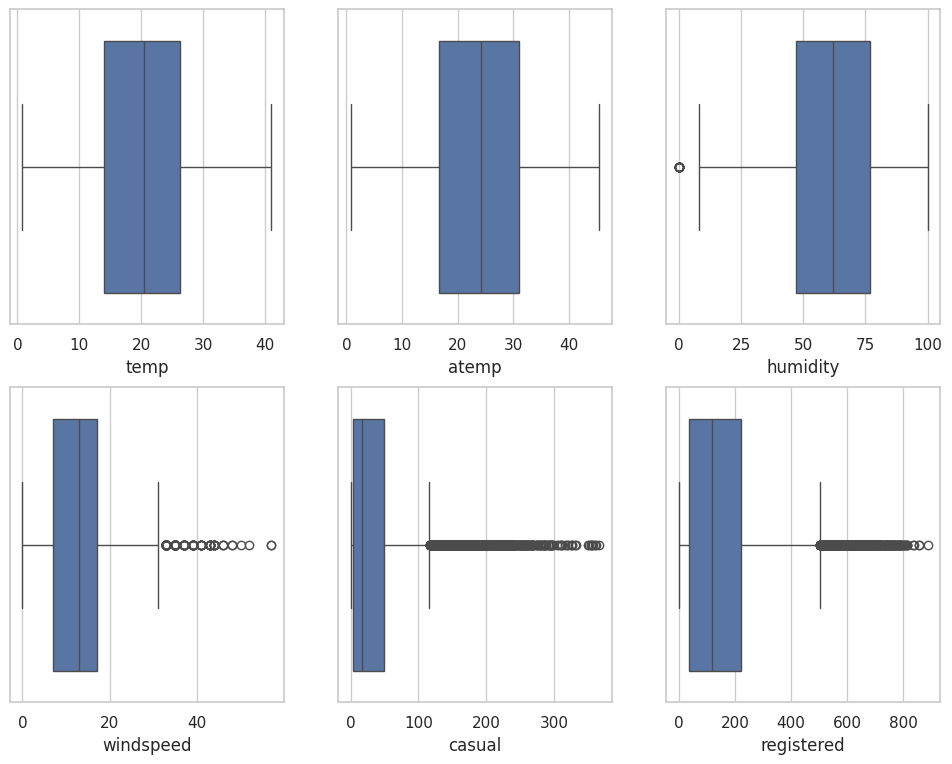

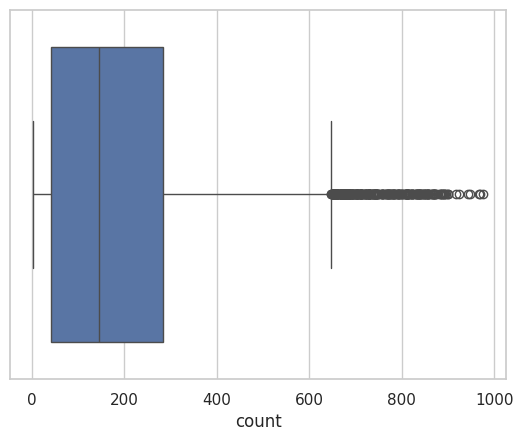

In [ ]:
# plotting box plots to detect outliers in the data
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 9))

index = 0
for row in range(2):
    for col in range(3):
        sns.boxplot(x=df[num_cols[index]], ax=axis[row, col])
        index += 1

plt.show()
sns.boxplot(x=df[num_cols[-1]])
plt.show()

Looks like humidity, casual, registered and count have outliers in the data.

Removing the outliers using IAQ method:

In [ ]:
# Removing outliers using IAQ method
q1 = dfn['count'].quantile(0.25)
q3 = dfn['count'].quantile(0.75)
iqr = q3-q1
dfn = dfn[(dfn['count']>(q1-1.5*iqr) ) & (dfn['count']<(q3+1.5*iqr))]
print("No. of rows : ", dfn.shape[0])

No. of rows :  10583


No. of rows before removing outliers: 10886.

No. of rows after removing outliers: 10583.

Aggregating the total no. of bike rides based on the given factors:

In [ ]:
# 1. Workingday -
pd.DataFrame(dfn.groupby('workingday')['count'].describe())

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3422.0,180.965517,163.782166,1.0,43.0,124.0,295.75,645.0
1,7161.0,173.011591,152.358993,1.0,38.0,143.0,262.00,646.0


In [ ]:
# 2. Holiday -
pd.DataFrame(dfn.groupby('holiday')['count'].describe())

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,10274.0,175.372786,155.950275,1.0,40.0,138.0,269.0,646.0
1,309.0,182.588997,163.766590,1.0,38.0,127.0,304.0,597.0


In [ ]:
# 3. Season -
pd.DataFrame(dfn.groupby('season')['count'].describe())

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2670.0,112.795131,116.884929,1.0,24.00,78.0,161.00,644.0
2,2633.0,195.653627,166.170802,1.0,45.00,165.0,299.00,646.0
3,2616.0,210.484327,164.055532,1.0,59.75,185.0,323.25,646.0
4,2664.0,184.404655,154.563069,1.0,48.75,154.0,276.25,646.0


In [ ]:
# 4. Weather -
pd.DataFrame(dfn.groupby('weather')['count'].describe())

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,6962.0,187.131140,161.333785,1.0,45.0,153.0,286.0,646.0
2,2770.0,166.117690,146.992422,1.0,39.0,130.0,254.0,646.0
3,850.0,111.862353,121.233389,1.0,23.0,70.5,157.0,646.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


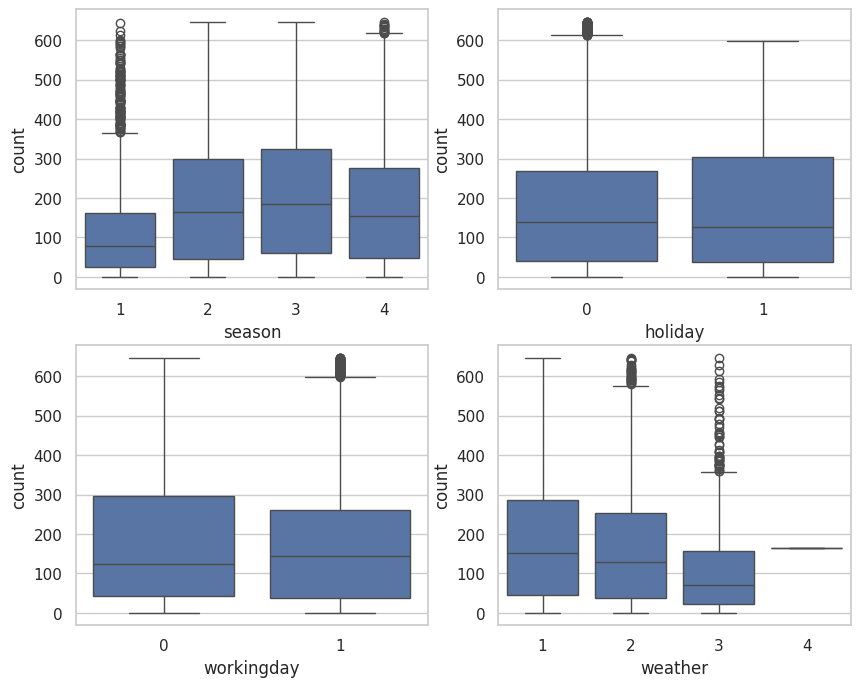

In [ ]:
# plotting categorical variables againt count using boxplots
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=dfn, x=cat_cols[index], y='count', ax=axis[row, col])
        index += 1

plt.show()

From the above aggregation and box plots, we can understand that:

In summer and fall seasons more bikes are rented as compared to other seasons.

Whenever its a holiday more bikes are rented.

It is also clear from the working day also that whenever day is holiday or weekend, slightly more bikes were rented.

Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.

#Hypothesis Testing:

To choose which test to use, first let's check the deviations of both the populations are same or not.

For that we are choosing to make test between "weekday" and "weekend".

Having both unequal sample sizes can lead to unequal variances between the samples and may  dramatically affects the statistical power of a test.

So we take same no. of samples from two different populations for conducting the tests.

In [ ]:
# Checking weather there is a significant difference between number of bike rides on weekdays vs weekends
# Checking weather the Standard deviantion for both the groups are same or not
weekday = dfn[dfn['workingday'] ==1]['count'].sample(2999)
weekend = dfn[dfn['workingday'] ==0]['count'].sample(2999)
print("Standard deviantion of weekdays is: ",round(weekday.std(), 2))
print("Standard deviantion of weekends is: ",round(weekend.std(), 2))

Standard deviantion of weekdays is:  152.13
Standard deviantion of weekends is:  163.86


From the above it's clear that the deviations for both the populations are different.

In [ ]:
# As the Standard deviantions are diffent, the population standard deviations can also be diffenrent.
# So the two sample independent t-test will be the appropriate test for this problem.

In [ ]:
# According to the given problem statement, the significance level is 5%. So the value of Alpha is '0.05'
alpha  = 0.05

Importing required libraries to perform the tests.

In [ ]:
from scipy.stats import ttest_ind # T-test for independent samples
from scipy.stats import shapiro # Shapiro-Wilk’s test for Normality
from scipy.stats import levene # Levene's test for Equality of Variance
from scipy.stats import f_oneway # One-way ANOVA
from scipy.stats import chi2_contingency # Chi-square test of independence

Defining the calculate_p function commonly for all the tests.

In [ ]:
# Defining the p_value function
def calculate_p(p_value, alpha):
  if p_value < alpha:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
  else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

t-test:

Null Hypothesis: The demand of bikes on weekdays have no difference with the demand of bikes on weekend.

Alternate Hypothesis: The demand of bikes on weekdays is different from the demand of bikes on weekend.

In [ ]:
# Now calculating p-value
test_stat, p_value = ttest_ind(weekday, weekend, equal_var=False, alternative="less")
print(f'The p_value is : {p_value}')
calculate_p(p_value=p_value, alpha=alpha)

The p_value is : 0.018228160483338262
As the p-value 0.018228160483338262 is less than the level of significance, we reject the null hypothesis.


Observation:

Since the p-value is greater than the 5% significance level, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the average no. of bike rides are getting effected by weekdays.

Now testing with another factor: Weather conditions.:

Null Hypothesis: The average no. of bike rides in different weather conditions are equal.

Alternate Hypothesis: The average no. of bike rides in different weather conditions are not equal.

In [ ]:
# Checking if number of cycles rented is same or different for different weather conditions


In [ ]:
dfn = dfn[~(dfn['weather']==4)]
w1 = dfn[dfn['weather'] == 1]['count'].sample(750)
w2 = dfn[dfn['weather'] == 2]['count'].sample(750)
w3 = dfn[dfn['weather'] == 3]['count'].sample(750)
dfn.groupby(['weather'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,6962.0,187.131140,161.333785,1.0,45.0,153.0,286.0,646.0
2,2770.0,166.117690,146.992422,1.0,39.0,130.0,254.0,646.0
3,850.0,111.862353,121.233389,1.0,23.0,70.5,157.0,646.0


This is a problem, concerning three independent population means .One-way ANOVA could be the appropriate test here provided normality and equality of variance assumptions are verified.

The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.

The samples are independent.

Each sample is from a normally distributed population.

The population variance of the groups are all equal.

Now, we will be using the following statistical tests to check the normality and equality of variance of the data set -

For testing of normality, Shapiro-Wilk's test is applied to the response variable.

For equality of variance, Levene test is applied to the response variable.

In [ ]:
# Shapiro-wilk's test
# Assumption 1: Normality
w, p_value = shapiro(dfn['count'].sample(4999))
print('The p-value is : ', p_value)
calculate_p(p_value, alpha)

The p-value is :  1.1171504190748973e-48
As the p-value 1.1171504190748973e-48 is less than the level of significance, we reject the null hypothesis.


In [ ]:
#Levene's test
#Assumption 2: Homogeneity of Variance
stat, p_value = levene(w1, w2, w3)
print('The p-value is : ', p_value)
calculate_p(p_value, alpha)

The p-value is :  8.2856081836819215e-19
As the p-value 8.2856081836819215e-19 is less than the level of significance, we reject the null hypothesis.


As these assumptions are not true for a given set of data, ANOVA test is failed. It may still be possible to use the Kruskal-Wallis H-test or the Alexander-Govern test although with some loss of power.

So here we are using kruskal test:

In [ ]:
# krushkal test
kruskal_stat, p_value = stats.kruskal(w1, w2, w3)
print('The p-value is : ', p_value)
calculate_p(p_value, alpha)

The p-value is :  3.1350048551024755e-26
As the p-value 3.1350048551024755e-26 is less than the level of significance, we reject the null hypothesis.


Since p-value is less than 0.05, we reject the null hypothesis. This implies that Number of cycles rented is not similar in different weather conditions.

In [ ]:
# Central Limit Theorem
#One-way ANOVA
test_stat, p_value = f_oneway(w1, w2, w3)
print('The p-value is : ', p_value)
calculate_p(p_value, alpha)

The p-value is :  3.492202466759523e-26
As the p-value 3.492202466759523e-26 is less than the level of significance, we reject the null hypothesis.


#Insights/Observations:

1. Total 10,886 rows were present in the data set.

2. Neither missing values, nor duplicate rows were found.

3. Dropped the highly correlated columns to avoid multicollinearity.

4. Outlier values were found in the 'count' column.

5. The no. of bikes rented on weekdays is comparatively higher than on weekends.

6. The no. of bikes rented on regular days is comparatively higher than on holidays.

7. The demand of bicycles on rent differs under different weather conditions.

8. The demand of bicycles on rent is different during different seasons.

9. The weather conditions are surely dependent upon the ongoing season.

#Recommendations:

1. The demand of bikes on rent are usually higher during Weekdays.

     The demand of bikes on rent are usually higher during Regular days.

     The chances of person renting a bike are usually higher during Season 3.

     The chances of person renting a bike are usually higher during Weather condition 1.

So company should maintain more bikes in the stocks to be rented on the above listed days.

2. In bad weather conditions, company should maintain less bikes to be rented.